In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
dataframe = pd.read_excel('./HDR21-22_Statistical_Annex_HDI_Table.xlsx')
dataframe

,HDI rank,Country,HDI,Life expectancy (Years),Schooling (Years),Mean schooling (Years),GNI per capita (PPP $),Difference (GNI-HDI)
0,3,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540,5
1,1,Norway,0.961,83.2339,18.185200,13.003630,64660.106220,6
2,2,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810,11
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.226210,62606.845400,6
4,5,Australia,0.951,84.5265,21.054590,12.726820,49238.433350,18
...,...,...,...,...,...,...,...,...
186,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709,4
187,188,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611,1
188,189,Niger,0.400,61.5763,6.957112,2.116717,1239.866936,-3
189,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417,-7


In [5]:
features = dataframe[['Life expectancy (Years)', 'Schooling (Years)', 'GNI per capita (PPP $)']]
features

,Life expectancy (Years),Schooling (Years),GNI per capita (PPP $)
0,83.9872,16.500299,66933.004540
1,83.2339,18.185200,64660.106220
2,82.6782,19.163059,55782.049810
3,85.4734,17.278170,62606.845400
4,84.5265,21.054590,49238.433350
...,...,...,...
186,61.6627,10.722722,731.786709
187,53.8947,8.040172,966.058611
188,61.5763,6.957112,1239.866936
189,52.5254,8.035914,1364.169417


In [13]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled[:10, :]

array([[1.66200837, 1.01693756, 2.14460542],
       [1.56322682, 1.59470074, 2.04019109],
       [1.49035691, 1.93001508, 1.63234339],
       [1.85689638, 1.28367426, 1.94586664],
       [1.73272772, 2.57863327, 1.33173717],
       [1.31950535, 1.77630405, 1.84286901],
       [1.5303652 , 2.01761748, 1.57295935],
       [1.40110864, 1.85531692, 2.56889571],
       [1.22178597, 1.19176499, 1.57501937],
       [1.36041845, 1.76888539, 1.64140993]])

In [30]:
clusters = 3
kmeans = KMeans(n_clusters=clusters, random_state=101, n_init=10)
dataframe['Cluster'] = kmeans.fit_predict(features_scaled)

In [31]:
dataframe['Cluster'].nunique()

3

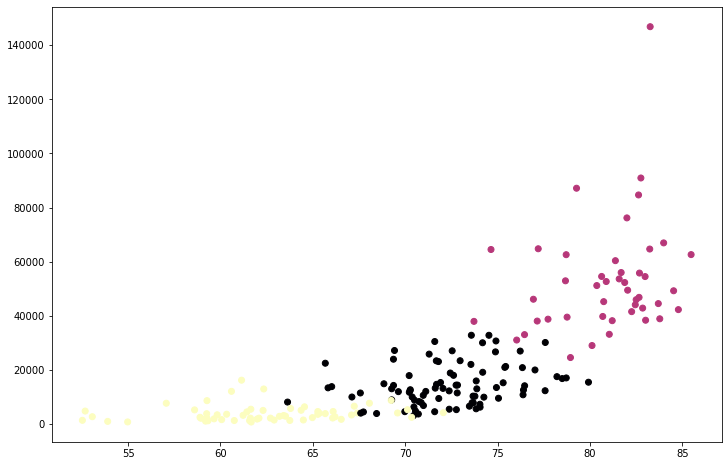

In [34]:
fig = plt.figure(figsize=(12, 8))

plt.scatter(dataframe['Life expectancy (Years)'], dataframe['GNI per capita (PPP $)'], c=dataframe['Cluster'], cmap='magma')